In [24]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [25]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

LABEL: 4

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0 

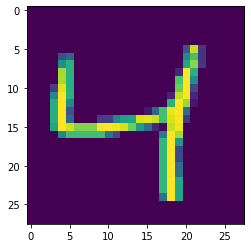

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 2

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {X_train[index]}')

# Visualize the image
plt.imshow(X_train[index])

In [39]:
# Normalize the pixel values of the train and test images
training_images  = X_train / 255.0
test_images = X_test / 255.0

In [47]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [48]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [49]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1367 - accuracy: 0.8437
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3732 - accuracy: 0.9079
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2862 - accuracy: 0.9268
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2490 - accuracy: 0.9362
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2302 - accuracy: 0.9418


In [50]:
# Evaluate the model on unseen data
model.evaluate(X_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2063 - accuracy: 0.9459


[0.20629334449768066, 0.945900022983551]